In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Jupyter only
%matplotlib inline

sns.set_theme(style="darkgrid")  # Valid usage
sns.set_palette("muted")         # Optional: set color palette

In [4]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
import shutil

# Optional: Set current directory as Kaggle config path
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Move from Downloads folder to current directory
shutil.move(
    r'C:\Users\Zubin Mehta\.kaggle',  # or your actual download path
    os.path.join(os.getcwd(), 'kaggle.json')
)

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\Zubin Mehta\.kaggle'

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Download and unzip dataset into current folder
api.dataset_download_files(
    'ankushpanday2/indian-kids-screentime-2025',
    path='.',
    unzip=True
)

In [ ]:
import os
os.listdir()

In [21]:
df = pd.read_csv('Indian_Kids_Screen_Time.csv')  # Replace with correct name
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [23]:
df.rename(columns={'Urban_or_Rural':'Area_Type','Educational_to_Recreational_Ratio':'learning_vs_entertainment_ratio'}, inplace=True)

df.head(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,learning_vs_entertainment_ratio,Health_Impacts,Area_Type
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [25]:
df.drop(columns=['Exceeded_Recommended_Limit'], inplace=True)
df.head(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,learning_vs_entertainment_ratio,Health_Impacts,Area_Type
0,14,Male,3.99,Smartphone,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,0.49,"Poor Sleep, Anxiety",Urban


In [27]:
df = df.dropna(subset = ['Health_Impacts'])

In [29]:
df.head(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,learning_vs_entertainment_ratio,Health_Impacts,Area_Type
0,14,Male,3.99,Smartphone,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,0.32,Poor Sleep,Urban
4,12,Female,5.89,Smartphone,0.49,"Poor Sleep, Anxiety",Urban
5,14,Female,4.88,Smartphone,0.44,Poor Sleep,Urban


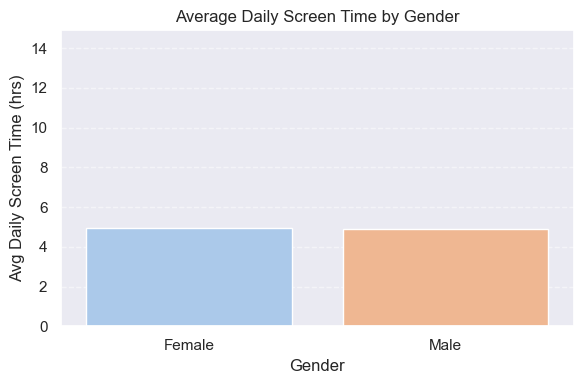

In [33]:
gender_screen_time = df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean().reset_index()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_screen_time, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='pastel')
plt.title('Average Daily Screen Time by Gender')
plt.ylabel('Avg Daily Screen Time (hrs)')
plt.xlabel('Gender')
plt.ylim(0, df['Avg_Daily_Screen_Time_hr'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Images/screen_time_by_gender.png", bbox_inches='tight')
plt.show()

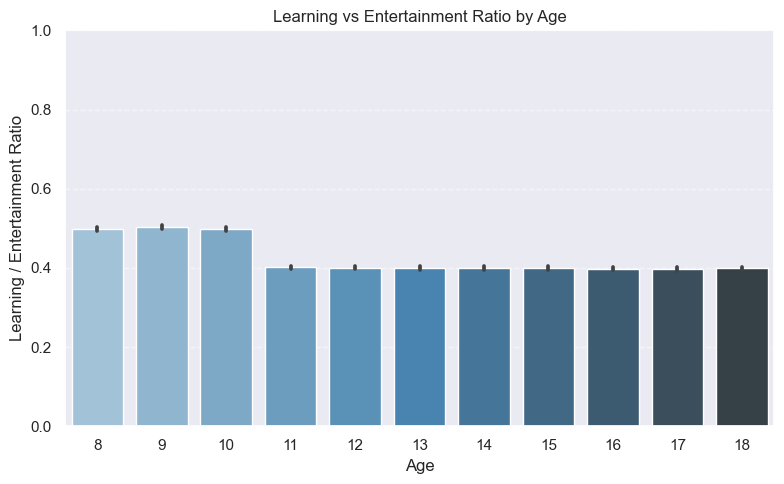

In [35]:
# Sort by age for better visualization
df_sorted = df.sort_values(by='Age')

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=df_sorted, x='Age', y='learning_vs_entertainment_ratio', palette='Blues_d')
plt.title('Learning vs Entertainment Ratio by Age')
plt.ylabel('Learning / Entertainment Ratio')
plt.xlabel('Age')
plt.ylim(0, 1)  # Ratios are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Images/learning_versus_entertainment_ratio.png", bbox_inches='tight')
plt.show()

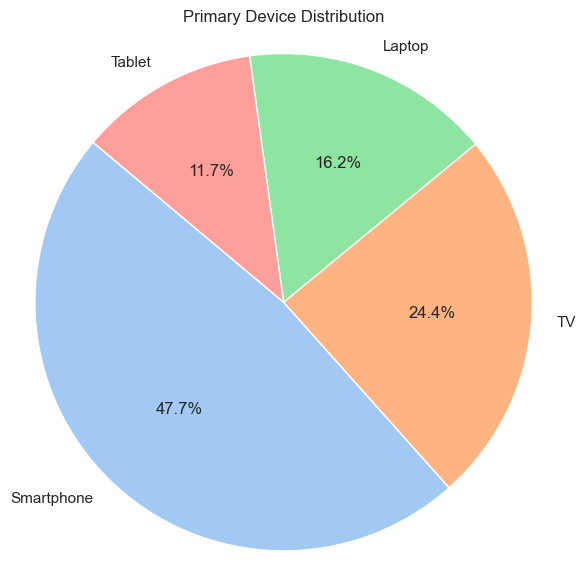

In [37]:
# Count of each device
device_counts = df['Primary_Device'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Primary Device Distribution')
plt.axis('equal')  # Makes the pie circular
plt.tight_layout()
plt.savefig("Images/primary_device_distribution.png", bbox_inches='tight')
plt.show()

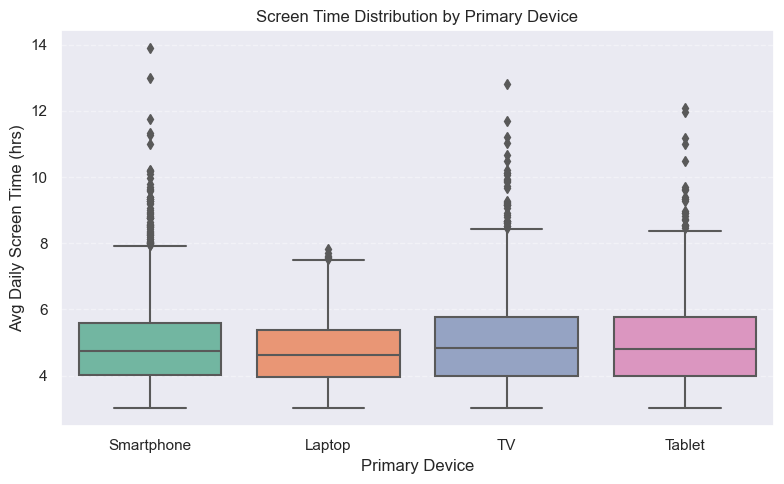

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', palette='Set2')
plt.title('Screen Time Distribution by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Avg Daily Screen Time (hrs)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("Images/screen_time_distribution_by_primary_device.png", bbox_inches='tight')
plt.show()

In [41]:
# Split by comma and explode into separate rows
df['Health_Impacts'] = df['Health_Impacts'].str.split(',')
exploded_df = df.explode('Health_Impacts')

# Clean extra whitespace
exploded_df['Health_Impacts'] = exploded_df['Health_Impacts'].str.strip()

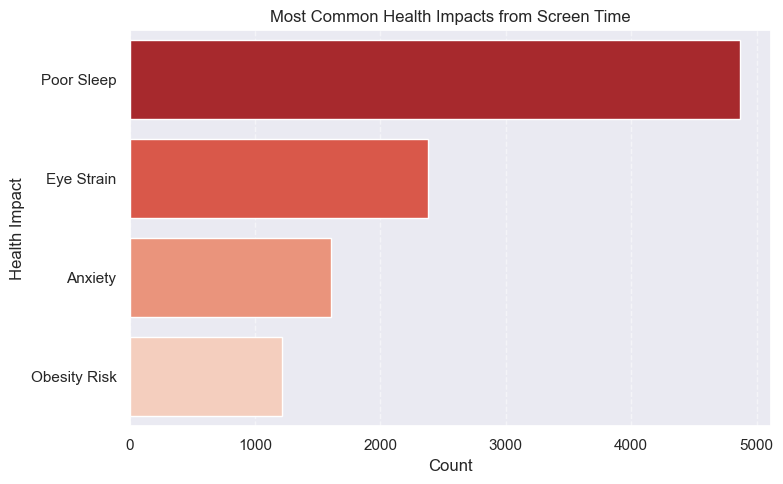

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(data=exploded_df, y='Health_Impacts', order=exploded_df['Health_Impacts'].value_counts().index, palette='Reds_r')
plt.title('Most Common Health Impacts from Screen Time')
plt.xlabel('Count')
plt.ylabel('Health Impact')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Images/health_impacts_from_screen_time.png", bbox_inches='tight')
plt.show()

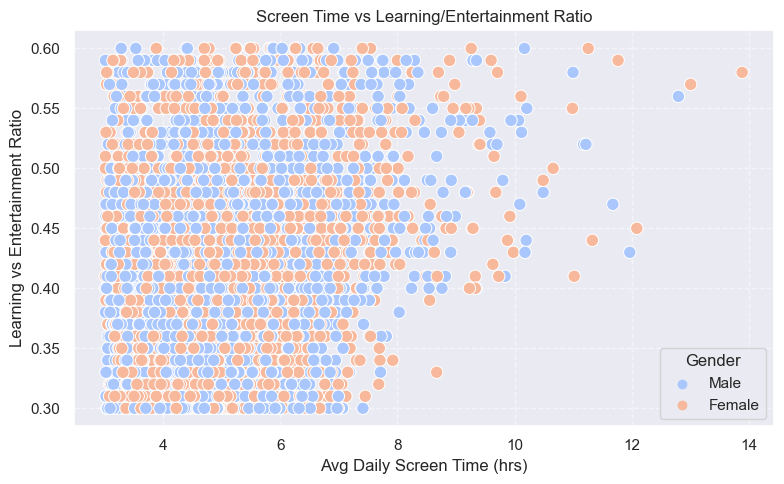

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Avg_Daily_Screen_Time_hr',
    y='learning_vs_entertainment_ratio',
    hue='Gender',  # Optional: adds color by gender
    palette='coolwarm',
    s=80
)
plt.title('Screen Time vs Learning/Entertainment Ratio')
plt.xlabel('Avg Daily Screen Time (hrs)')
plt.ylabel('Learning vs Entertainment Ratio')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Images/screen_time_by_learning_versus_entertainment_ratio.png", bbox_inches='tight')
plt.show()

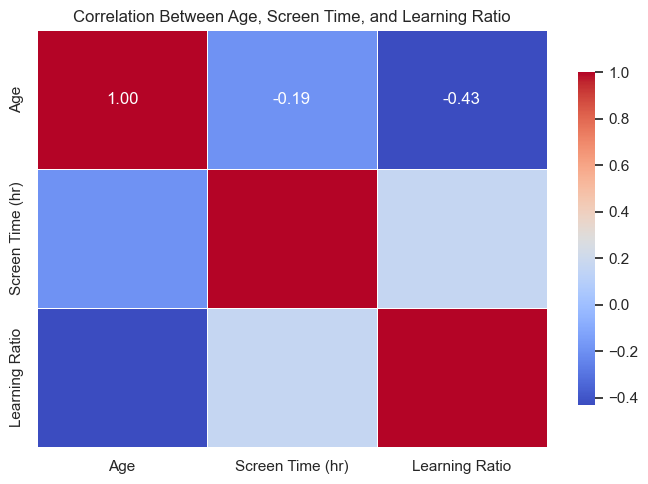

In [47]:
# Shorten column names for better readability
df_renamed = df.rename(columns={
    'Avg_Daily_Screen_Time_hr': 'Screen Time (hr)',
    'learning_vs_entertainment_ratio': 'Learning Ratio'
})

# Correlation matrix with renamed columns
corr_matrix = df_renamed[['Age', 'Screen Time (hr)', 'Learning Ratio']].corr()

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=False,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Between Age, Screen Time, and Learning Ratio')
plt.tight_layout()
plt.savefig("Images/screen_time_age_learning_correlation.png", bbox_inches='tight')
plt.show()